# Heat Map

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read stemmed report, word reference table, lsa results
report = pd.read_csv("02-ASRS-stemmed.csv", index_col=0)
word_reference = pd.read_csv("02-ASRS-word-reference.csv", index_col=0)
lsa = pd.read_csv("03-lsa.csv", index_col=0)

# Word reference lookup helper
def lookup(word):
    for i in range(len(word_reference)):
        if word_reference['after'][i] == word:
            print(word_reference['before'][i])
            break

In [3]:
# Read original report data
data = pd.read_csv("02-ASRS_DBOnline.csv",index_col=0).reset_index()
data.columns = data.iloc[0].tolist()
data = data[1:].reset_index(drop=True)
data.to_csv('04-ASRS-clean.csv')
data.head()

,ACN,Date,Local Time Of Day,Locale Reference,State Reference,Relative Position.Angle.Radial,Relative Position.Distance.Nautical Miles,Altitude.AGL.Single Value,Altitude.MSL.Single Value,Flight Conditions,...,When Detected,Result,Contributing Factors / Situations,Primary Problem,Narrative,Callback,Narrative,Callback,Synopsis,nan
0,81135,198801,0601-1200,BDR; 0N0,CT,360,9,NaN,2500,VMC,...,NaN,Flight Crew Took Evasive Action,NaN,Human Factors,F/O FLYING ACFT FROM LEFT SEAT. BLUE AND WHITE...,NaN,NaN,NaN,HELICOPTER ENCOUNTERED SMA ACFT IN SEE AND AVO...,NaN
1,81311,198801,1201-1800,BAF,MA,NaN,22,NaN,4500,VMC,...,NaN,Flight Crew Took Evasive Action,NaN,Human Factors,WHILE LEVEL AT 4500'; HDG 246 DEGS ON VICTOR 1...,NaN,NaN,NaN,CLOSE PROX GA-SMA GA-SMT ON V106.,NaN
2,81663,198801,0601-1200,PYM,MA,NaN,2,NaN,800,VMC,...,NaN,Flight Crew Executed Go Around / Missed Approach,NaN,Human Factors,I WAS INVOLVED IN A NMAC WHILE ON FINAL APCH T...,NaN,NaN,NaN,CLOSE PROX 2 GA-SMA ACFT IN TRAFFIC PATTERN AT...,NaN
3,81862,198802,1201-1800,BED,MA,NaN,15,NaN,3500,VMC,...,NaN,Flight Crew Took Evasive Action,NaN,Human Factors,WHILE ON CROSS-COUNTRY VFR FROM ORANGE; MA TO ...,NaN,NaN,NaN,CLOSE PROX GA SMA AND PARACHUTIST IN RESTRICTE...,NaN
4,83153,198802,1201-1800,PVD,RI,NaN,2,NaN,1800,VMC,...,NaN,Flight Crew Took Evasive Action; General None ...,NaN,Human Factors,UPON REACHING MADISON VOR WE REQUESTED CLRNC D...,NaN,NaN,NaN,LESS THAN STANDARD SEPARATON AND NMAC BETWEEN ...,NaN


In [4]:
# Get altitude and primary problems
df = data[['Altitude.MSL.Single Value', 'Primary Problem']].dropna()
df.head()

,Altitude.MSL.Single Value,Primary Problem
0,2500,Human Factors
1,4500,Human Factors
2,800,Human Factors
3,3500,Human Factors
4,1800,Human Factors


In [5]:
primary_problems = df.groupby('Primary Problem').size().index.tolist()
altitudes = df.groupby('Altitude.MSL.Single Value').size().index
print('Primary problems: {}'.format(primary_problems))
print('Min altitude: {}'.format(min(altitudes)))
print('Max altitude: {}'.format(max(altitudes)))

Primary problems: ['ATC Equipment / Nav Facility / Buildings', 'Aircraft', 'Airport', 'Airspace Structure', 'Ambiguous', 'Environment - Non Weather Related', 'Human Factors', 'Procedure', 'Staffing', 'Weather']
Min altitude: 0
Max altitude: 9900


In [6]:
altitude_ranges = [range(2000), range(2000,4000), range(4000,6000), range(6000,8000), range(10000)]
df_count = pd.DataFrame(np.zeros((len(altitude_ranges), len(primary_problems))))
df_count.columns = primary_problems
df_count.index = ['0-2000', '2000-4000', '4000-6000', '6000-8000', '8000-10000']

In [7]:
for index, row in df.iterrows():
    alt = int(row['Altitude.MSL.Single Value'])
    p = row['Primary Problem']
    for i in range(len(altitude_ranges)):
        if alt in altitude_ranges[i]:
            df_count.iloc[i][p] += 1
df_count

,ATC Equipment / Nav Facility / Buildings,Aircraft,Airport,Airspace Structure,Ambiguous,Environment - Non Weather Related,Human Factors,Procedure,Staffing,Weather
0-2000,0.0,2.0,1.0,1.0,17.0,0.0,123.0,6.0,0.0,2.0
2000-4000,1.0,7.0,0.0,2.0,11.0,1.0,119.0,8.0,0.0,0.0
4000-6000,1.0,6.0,0.0,2.0,9.0,1.0,88.0,4.0,0.0,0.0
6000-8000,1.0,0.0,0.0,1.0,4.0,0.0,64.0,0.0,1.0,0.0
8000-10000,3.0,16.0,1.0,7.0,45.0,2.0,437.0,20.0,1.0,2.0


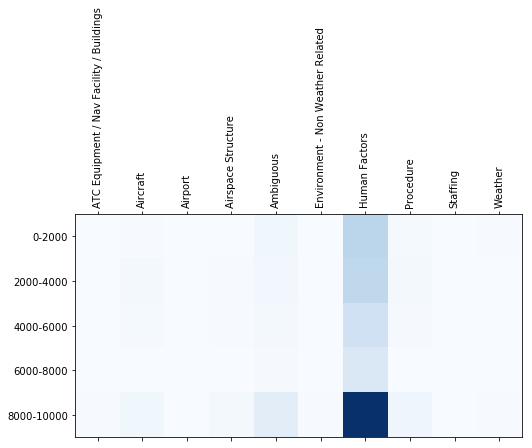

In [8]:
plt.figure(figsize=(20, 20))
plt.matshow(df_count.values, cmap=plt.cm.Blues)
plt.xticks(np.arange(df_count.shape[1]), df_count.columns.tolist(), rotation='vertical')
plt.yticks(np.arange(df_count.shape[0]), df_count.index.tolist());

In [9]:
df_count_nonhumans = df_count.drop('Human Factors', axis=1)

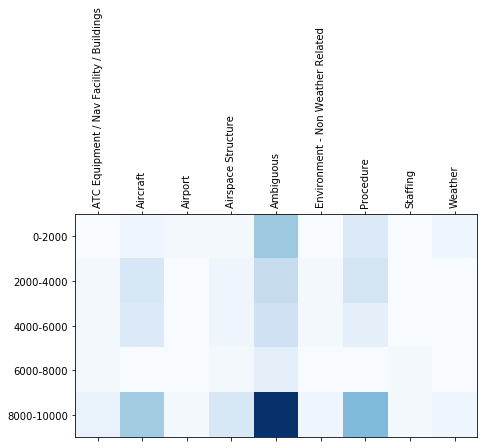

In [10]:
plt.figure(figsize=(20, 20))
plt.matshow(df_count_nonhumans.values, cmap=plt.cm.Blues)
plt.xticks(np.arange(df_count_nonhumans.shape[1]), df_count_nonhumans.columns.tolist(), rotation='vertical')
plt.yticks(np.arange(df_count_nonhumans.shape[0]), df_count_nonhumans.index.tolist());